# GRU model

## Setup

In [ ]:
# !pip install gensim

In [ ]:
# import nltk
# nltk.download("stopwords")

In [71]:
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Masking, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import gensim.downloader as api
from nltk.corpus import stopwords

In [72]:
X = pd.read_csv("../processed_data/features_1000sample_400min_600cutoff_for_embed.csv")
y = pd.read_csv("../processed_data/target_1000sample_400min_600cutoff_for_embed.csv")

In [73]:
codes = {p: i for i, p in enumerate(y["party"].unique())}
# y = y["party"].map(codes)
y = OneHotEncoder(sparse_output=False).fit_transform(y["party"].values.reshape(-1, 1))
X = X["text"]

In [74]:
X.shape, y.shape

((7000,), (7000, 7))

## Preprocessing

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Embed the training and test sentences

In [77]:
stop_words = set(stopwords.words('english'))

# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec and word not in stop_words:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence.split())
        embed.append(embedded_sentence)
        
    return embed

In [78]:
word2vec_model = api.load("glove-wiki-gigaword-100")

In [79]:
X_train_embed = embedding(word2vec_model, X_train)
X_test_embed = embedding(word2vec_model, X_test)

### Pad sequences to ensure uniform input size

In [80]:
maxlen = max(max([len(x) for x in X_train_embed]), max([len(x) for x in X_test_embed])) # Maximum sequence length
maxlen

407

In [81]:
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post', maxlen=maxlen)

## The model

In [24]:
# # Convert words to Word2Vec embeddings
# word_index = tokenizer.word_index
# embedding_matrix = np.zeros((len(word_index) + 1, 300))  # Assuming Word2Vec vectors are 300-dimensional

# for word, i in word_index.items():
#     if word in word2vec_model:
#         embedding_matrix[i] = word2vec_model[word]

# # Define the model
# embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,
#                                             300,  # Assuming Word2Vec vectors are 300-dimensional
#                                             weights=[embedding_matrix],
#                                             input_length=maxlen,
#                                             trainable=False)  # Freeze the embedding layer

In [11]:
# # Define the model
# # 51.14%
# model = Sequential()
# model.add(Masking())
# model.add(GRU(128, activation="tanh", return_sequences=True))
# model.add(GRU(128, activation="tanh", dropout=0.2, recurrent_dropout=0.4,
#               kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(7, activation="softmax"))

# # Compile the model
# my_adam = Adam(learning_rate=0.003)
# model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Early stopping
# es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [13]:
# # Define the model
# # 53.12%
# model = Sequential()
# model.add(Masking())
# model.add(GRU(128, activation="tanh", dropout=0.2, return_sequences=True))
# model.add(GRU(128, activation="tanh", dropout=0.2, recurrent_dropout=0.4,
#               kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(7, activation="softmax"))

# # Compile the model
# my_adam = Adam(learning_rate=0.003)
# model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Early stopping
# es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [14]:
# # Define the model
# # 52.41%
# model = Sequential()
# model.add(Masking())
# model.add(GRU(128, activation="tanh", return_sequences=True))
# model.add(GRU(128, activation="tanh", dropout=0.2, recurrent_dropout=0.4,
#               kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(7, activation="softmax"))

# # Compile the model
# my_adam = Adam(learning_rate=0.003)
# model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Early stopping
# es = EarlyStopping(patience=15, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [16]:
# # Define the model
# # 52.95%
# model = Sequential()
# model.add(Masking())
# model.add(GRU(200, activation="tanh", return_sequences=True))
# model.add(GRU(200, activation="tanh", dropout=0.2, recurrent_dropout=0.4,
#               kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(64, activation="relu"))
# # model.add(Dropout(0.2))
# model.add(Dense(7, activation="softmax"))

# # Compile the model
# my_adam = Adam(learning_rate=0.003)
# model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Early stopping
# es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [14]:
# # Define the model
# # 53.75%
# model = Sequential()
# model.add(Masking())
# model.add(GRU(200, activation="tanh", return_sequences=True))
# model.add(GRU(150, activation="tanh", dropout=0.4, recurrent_dropout=0.4,
#               kernel_regularizer=regularizers.l2(0.015)))
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(64, activation="relu"))
# # model.add(Dropout(0.2))
# model.add(Dense(7, activation="softmax"))

# # Compile the model
# my_adam = Adam(learning_rate=0.003)
# model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Early stopping
# es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [107]:
# Define the model
# 53.57%
model = Sequential()
model.add(Masking())
model.add(GRU(200, activation="tanh", return_sequences=True))
model.add(GRU(150, activation="tanh", dropout=0.2,
              kernel_regularizer=regularizers.l2(0.015)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7, activation="softmax"))

# Compile the model
my_adam = Adam(learning_rate=0.0005)
model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(patience=15, restore_best_weights=True, monitor="val_accuracy", mode="max", verbose=1)

In [108]:
# Train the model
history = model.fit(
    np.array(X_train_pad), np.array(y_train), epochs=100, batch_size=32, 
    validation_split=0.2, callbacks=[es], shuffle=True)

Epoch 1/100
140/140 [==============================] - 73s 481ms/step - loss: 3.7733 - accuracy: 0.1538 - val_loss: 2.4835 - val_accuracy: 0.2179
Epoch 2/100
140/140 [==============================] - 66s 472ms/step - loss: 2.1476 - accuracy: 0.1920 - val_loss: 1.9627 - val_accuracy: 0.1920
Epoch 3/100
140/140 [==============================] - 66s 472ms/step - loss: 1.8689 - accuracy: 0.2317 - val_loss: 1.6816 - val_accuracy: 0.2893
Epoch 4/100
140/140 [==============================] - 66s 473ms/step - loss: 1.7336 - accuracy: 0.2672 - val_loss: 1.6236 - val_accuracy: 0.2893
Epoch 5/100
140/140 [==============================] - 66s 471ms/step - loss: 1.6546 - accuracy: 0.2871 - val_loss: 1.5458 - val_accuracy: 0.3286
Epoch 6/100
140/140 [==============================] - 66s 470ms/step - loss: 1.5875 - accuracy: 0.3127 - val_loss: 1.4930 - val_accuracy: 0.3679
Epoch 7/100
140/140 [==============================] - 65s 468ms/step - loss: 1.4787 - accuracy: 0.3844 - val_loss: 1.4608 -

In [109]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

44/44 [==============================] - 10s 158ms/step - loss: 1.2106 - accuracy: 0.5171
Test Accuracy: 51.71%


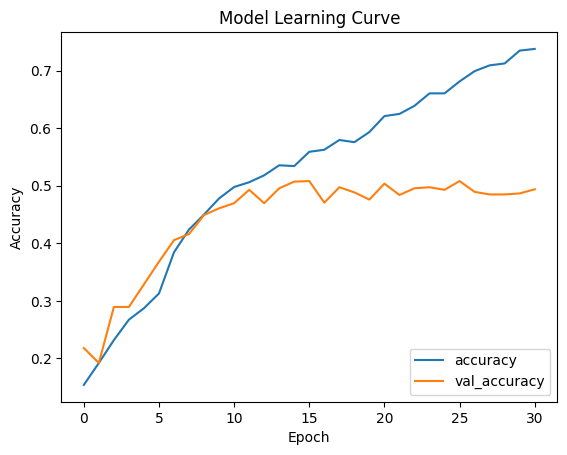

In [110]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Learning Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(history)

In [105]:
# !pip install -e ..

In [111]:
from polclassifier.ml_logic.registry import save_model_keras

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

save_model_keras(model)

✅ Model saved locally


In [112]:
y_pred = to_categorical(np.argmax(model.predict(X_test_pad), axis=1), 7)

# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

44/44 [==============================] - 9s 159ms/step


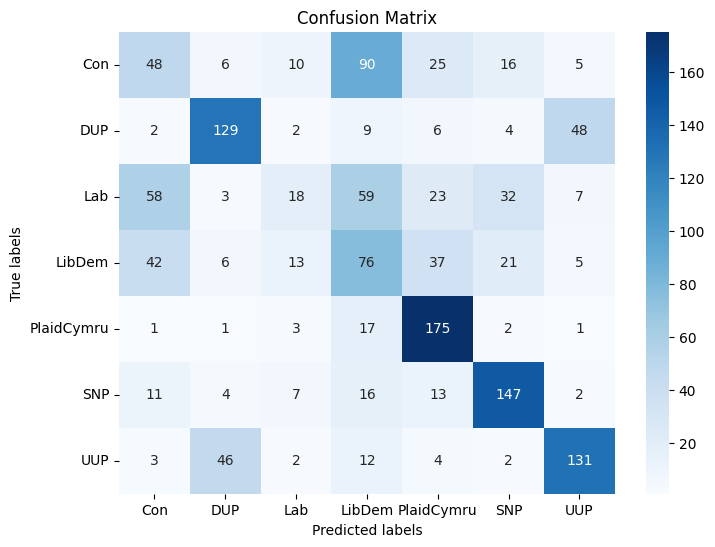

In [113]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=codes.keys(), yticklabels=codes.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [114]:
codes

{'Con': 0,
 'DUP': 1,
 'Lab': 2,
 'LibDem': 3,
 'PlaidCymru': 4,
 'SNP': 5,
 'UUP': 6}

In [115]:
pd.Series(y_test.argmax(axis=1)).value_counts().sort_index()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
Name: count, dtype: int64

In [116]:
pd.Series(y_pred.argmax(axis=1)).value_counts().sort_index()

0    165
1    195
2     55
3    279
4    283
5    224
6    199
Name: count, dtype: int64